GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space

Some words often come in pairs, like `nice and easy` or `pros and cons`. So the co-occurrence of words in a corpus can teach us something about its meaning. 
Sometimes, it means they are similar or sometimes it means they are opposite.

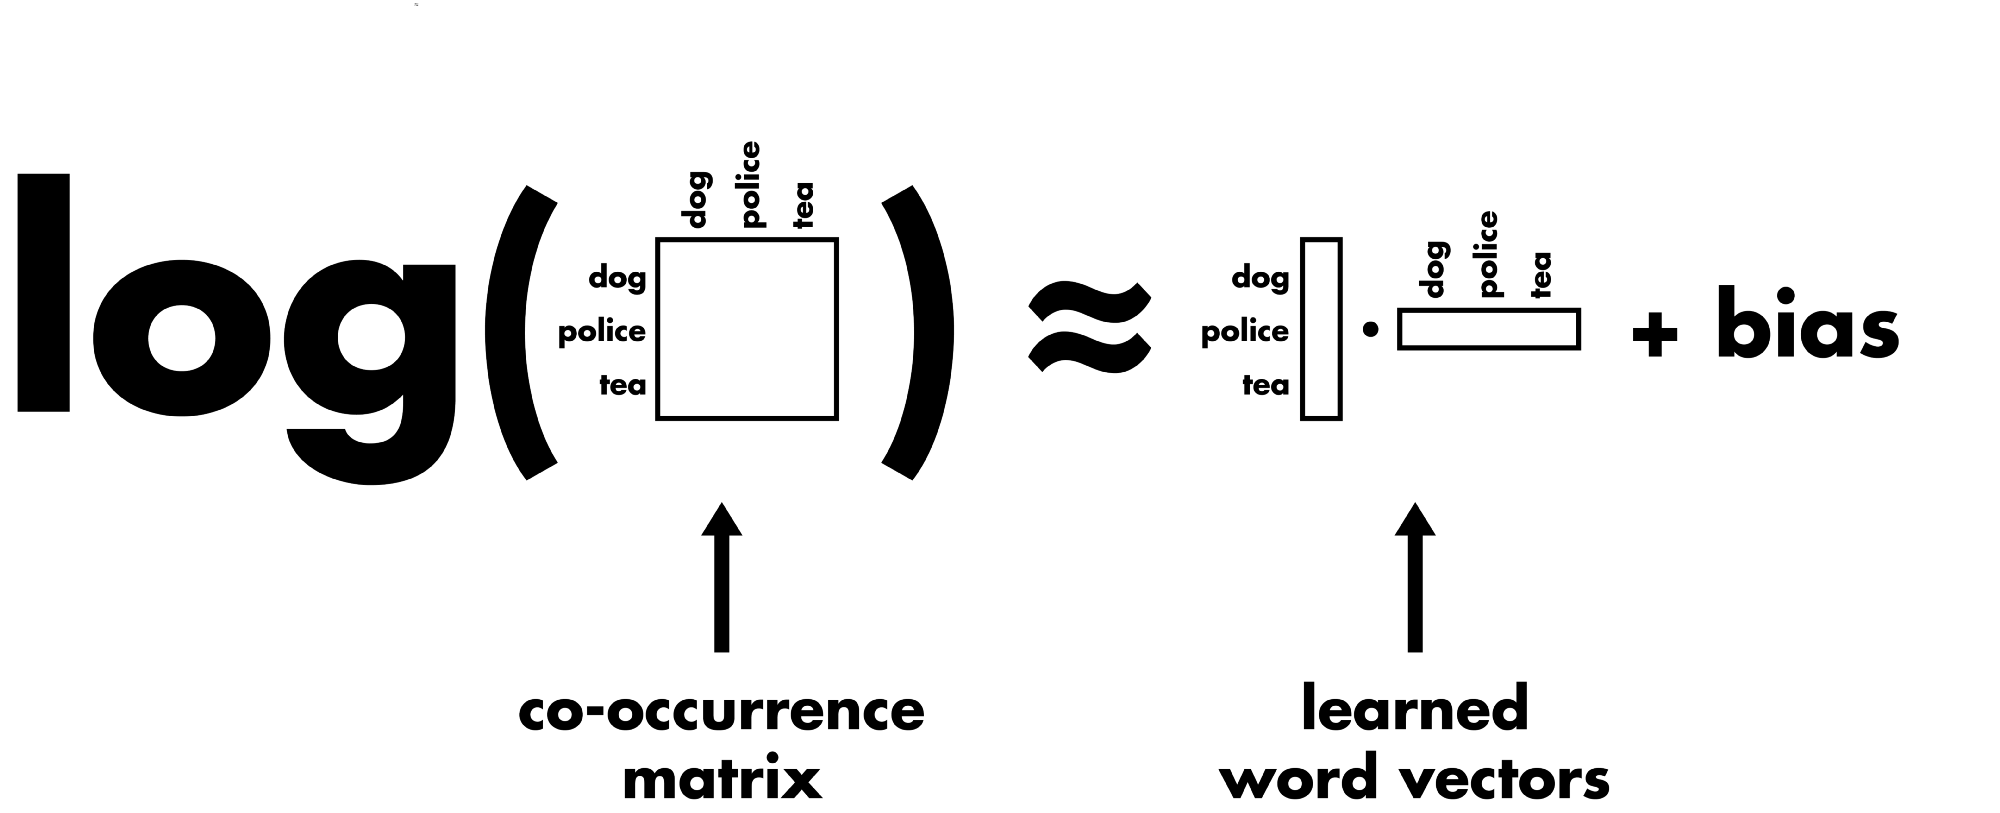

The training objective is to learn word vectors such that their dot product equals the logarithm of the words’ probability of co-occurrence.

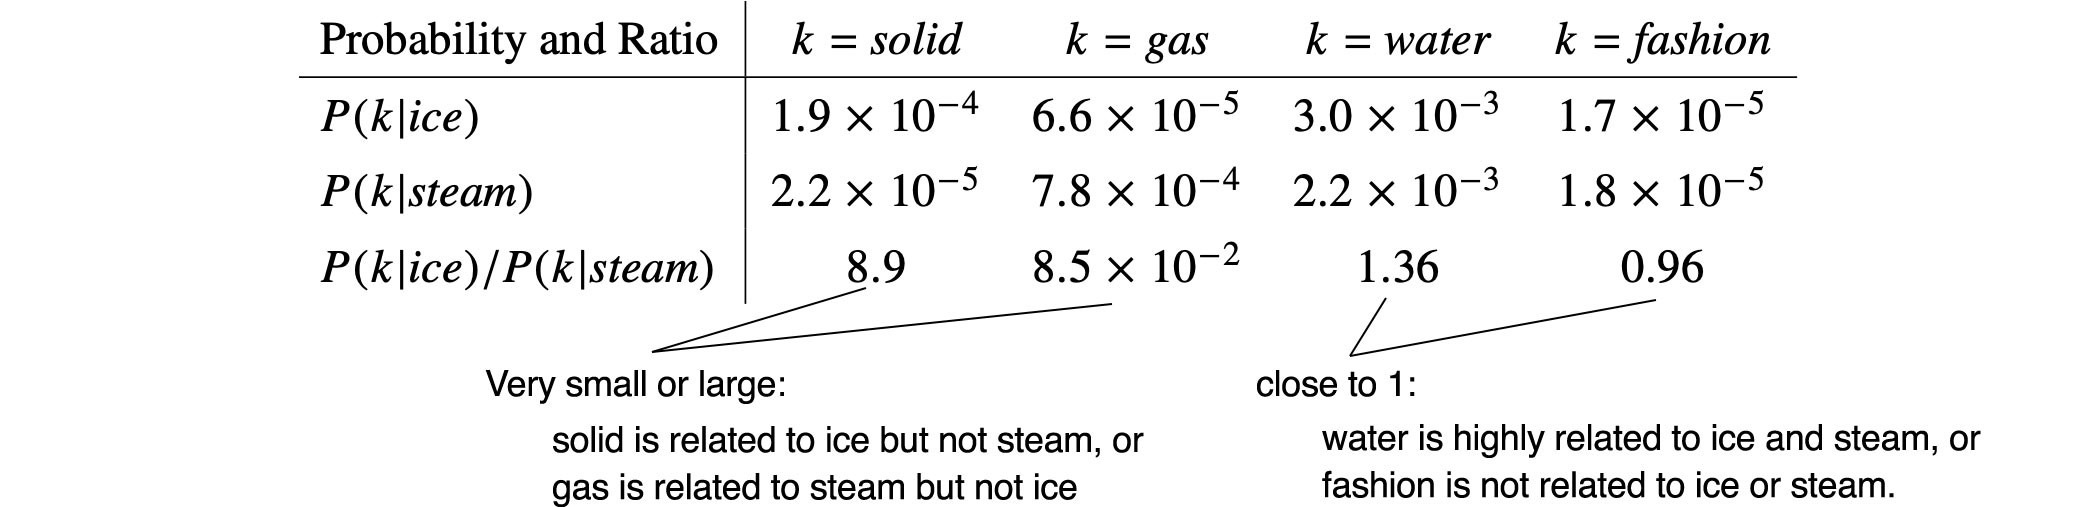

## Emotion Recognition from Text Data 

In [1]:
import numpy as np
from numpy import array
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

In [4]:
import preprocess_kgptalkie as ps

In [5]:
df = pd.read_csv('../../Inputs/text_to_emotion.csv')
df.head()

,text,emotion
0,i feel cold,ANGER
1,i feel the cold i can say he sends it,ANGER
2,i remember feeling like my blood had run cold ...,ANGER
3,i hate too is stepping outside in the cold and...,ANGER
4,i don't think i am anti social i just don't re...,ANGER


In [6]:
df.shape

(30000, 2)

In [7]:
df['emotion'].value_counts()

ANGER       5000
FEAR        5000
JOY         5000
LOVE        5000
SADNESS     5000
SURPRISE    5000
Name: emotion, dtype: int64

## Preprocessing and Cleaning 

In [8]:
%%time
df['text'] = df['text'].apply(lambda x: str(x).lower())
df['text'] = df['text'].apply(lambda x: ps.cont_exp(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_accented_chars(x))

CPU times: user 26.2 s, sys: 1.08 s, total: 27.2 s
Wall time: 27.4 s


In [9]:
df['text']

0                                              i feel cold
1                    i feel the cold i can say he sends it
2        i remember feeling like my blood had run cold ...
3        i hate too is stepping outside in the cold and...
4        i do not think i am anti social i just do not ...
                               ...                        
29995    i feel like i am just here watching my body wo...
29996    i am not a person who first created the idea e...
29997    i feel a little surprised as if i don t know w...
29998    i feel like people don t tell me things then a...
29999    i get that old feeling the one where i am not ...
Name: text, Length: 30000, dtype: object

## Load GloVe Vector 

In [10]:
glove_vectors = dict()

In [11]:
%%time

file = open('../../Inputs/glove/glove.6B.100d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    word  = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
    
file.close()

CPU times: user 11.8 s, sys: 667 ms, total: 12.4 s
Wall time: 12.5 s


In [12]:
glove_vectors

{'the': array(['-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172',
        '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459',
        '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231',
        '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336',
        '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971',
        '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722',
        '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397',
        '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531',
        '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477',
        '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205',
        '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167',
        '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079',
        '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044',
        '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972',
        '0

In [13]:
len(glove_vectors)

400001

In [14]:
glove_vectors.get('theeee')

In [55]:
glove_vectors.get('woma')

array(['-0.50045', '-0.70826', '0.55388', '0.673', '0.22486', '0.60281',
       '-0.26194', '0.73872', '-0.65383', '-0.21606', '-0.33806',
       '0.24498', '-0.51497', '0.8568', '-0.37199', '-0.58824', '0.30637',
       '-0.30668', '-0.2187', '0.78369', '-0.61944', '-0.54925',
       '0.43067', '-0.027348', '0.97574', '0.46169', '0.11486',
       '-0.99842', '1.0661', '-0.20819', '0.53158', '0.40922', '1.0406',
       '0.24943', '0.18709', '0.41528', '-0.95408', '0.36822', '-0.37948',
       '-0.6802', '-0.14578', '-0.20113', '0.17113', '-0.55705', '0.7191',
       '0.070014', '-0.23637', '0.49534', '1.1576', '-0.05078', '0.25731',
       '-0.091052', '1.2663', '1.1047', '-0.51584', '-2.0033', '-0.64821',
       '0.16417', '0.32935', '0.048484', '0.18997', '0.66116', '0.080882',
       '0.3364', '0.22758', '0.1462', '-0.51005', '0.63777', '0.47299',
       '-0.3282', '0.083899', '-0.78547', '0.099148', '0.039176',
       '0.27893', '0.11747', '0.57862', '0.043639', '-0.15965',
       

In [15]:
glove_vectors.get('the')

array(['-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172',
       '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459',
       '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231',
       '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336',
       '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971',
       '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722',
       '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397',
       '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531',
       '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477',
       '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205',
       '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167',
       '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079',
       '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044',
       '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972',
       '0.15006', '-0.53212', '

## Text to GloVe Vectors 

In [16]:
vec_shape = 100

In [17]:
x = 'hi hello'

In [44]:
array =((glove_vectors.get('hi').astype(float) + glove_vectors.get('hello').astype(float))/2).reshape(1, -1)[0]

In [46]:
array

array([ 0.20564   ,  0.318055  ,  0.791915  , -0.22911   , -0.23227   ,
       -0.304885  ,  0.188656  ,  0.31035   ,  0.24237925,  0.093247  ,
        0.518035  , -0.167876  ,  0.116365  ,  0.0744725 ,  0.47626   ,
        0.369575  ,  0.24394485,  0.333995  ,  0.075493  ,  0.533845  ,
       -0.00424   ,  0.447805  , -0.418605  , -0.01731   ,  0.26461   ,
        0.84253   , -0.024665  , -0.50324   ,  0.594255  ,  0.1396135 ,
       -0.545653  ,  0.545722  ,  1.00586   ,  0.61941   ,  0.010725  ,
        0.187665  ,  0.146405  , -0.164965  , -0.01355   , -0.871535  ,
        0.4865505 , -0.140028  , -0.552375  ,  0.04927   , -0.0673045 ,
       -0.41111   , -0.30053   ,  0.449033  ,  0.05326   , -0.392912  ,
       -1.028545  ,  0.481815  ,  0.07216   , -0.420745  , -0.59075   ,
       -0.598985  ,  0.442906  ,  1.027365  ,  0.20936   , -0.19825   ,
       -0.073028  ,  0.428975  , -0.951125  , -0.192655  , -0.002545  ,
        0.26901   ,  0.30755   ,  0.374885  ,  0.41701   , -0.06

In [19]:
def get_vec(x):
    arr = np.zeros(vec_shape)
    text = str(x).split()  
    for t in text:
        try:
            vec = glove_vectors.get(t).astype(float)
            arr = arr + vec
        except:
            pass      
    arr = arr.reshape(1, -1)[0]
    return arr/len(text)

In [20]:
get_vec(x)

array([ 0.20564   ,  0.318055  ,  0.791915  , -0.22911   , -0.23227   ,
       -0.304885  ,  0.188656  ,  0.31035   ,  0.24237925,  0.093247  ,
        0.518035  , -0.167876  ,  0.116365  ,  0.0744725 ,  0.47626   ,
        0.369575  ,  0.24394485,  0.333995  ,  0.075493  ,  0.533845  ,
       -0.00424   ,  0.447805  , -0.418605  , -0.01731   ,  0.26461   ,
        0.84253   , -0.024665  , -0.50324   ,  0.594255  ,  0.1396135 ,
       -0.545653  ,  0.545722  ,  1.00586   ,  0.61941   ,  0.010725  ,
        0.187665  ,  0.146405  , -0.164965  , -0.01355   , -0.871535  ,
        0.4865505 , -0.140028  , -0.552375  ,  0.04927   , -0.0673045 ,
       -0.41111   , -0.30053   ,  0.449033  ,  0.05326   , -0.392912  ,
       -1.028545  ,  0.481815  ,  0.07216   , -0.420745  , -0.59075   ,
       -0.598985  ,  0.442906  ,  1.027365  ,  0.20936   , -0.19825   ,
       -0.073028  ,  0.428975  , -0.951125  , -0.192655  , -0.002545  ,
        0.26901   ,  0.30755   ,  0.374885  ,  0.41701   , -0.06

In [21]:
get_vec('hello hi how are you').shape

(100,)

In [22]:
%%time
df['vec'] = df['text'].apply(lambda x: get_vec(x))

CPU times: user 21.1 s, sys: 103 ms, total: 21.2 s
Wall time: 21.3 s


## ML Model Building, Training, and Testing

In [23]:
X = df['vec']
y = df['emotion']

In [47]:
df

,text,emotion,vec
0,i feel cold,ANGER,"[-0.26700799999999997, 0.6633566666666666, 0.7..."
1,i feel the cold i can say he sends it,ANGER,"[-0.22076089999999998, 0.4482507, 0.661141, -0..."
2,i remember feeling like my blood had run cold ...,ANGER,"[0.07080416111111111, 0.3336016666666666, 0.40..."
3,i hate too is stepping outside in the cold and...,ANGER,"[-0.1415063259259259, 0.20625797777777777, 0.3..."
4,i do not think i am anti social i just do not ...,ANGER,"[-0.10033871904761904, 0.31728433333333333, 0...."
...,...,...,...
29995,i feel like i am just here watching my body wo...,SURPRISE,"[-0.12335857142857144, 0.28631307142857143, 0...."
29996,i am not a person who first created the idea e...,SURPRISE,"[-0.03749547368421053, 0.14457099999999998, 0...."
29997,i feel a little surprised as if i don t know w...,SURPRISE,"[-0.0044482176470588145, 0.27805682352941175, ..."
29998,i feel like people don t tell me things then a...,SURPRISE,"[-0.07938582307692309, 0.25052637692307694, 0...."


In [24]:
X.shape

(30000,)

In [25]:
X = np.concatenate(X, axis = 0).reshape(-1, vec_shape)

In [26]:
X.shape, y.shape

((30000, 100), (30000,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [28]:
X_train.shape, X_test.shape

((24000, 100), (6000, 100))

In [29]:
clf = LogisticRegression(multi_class='auto')

In [30]:
clf.fit(X_train, y_train)

/Users/ariedamuco/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       ANGER       0.69      0.68      0.69      1000
        FEAR       0.71      0.70      0.70      1000
         JOY       0.74      0.74      0.74      1000
        LOVE       0.82      0.83      0.83      1000
     SADNESS       0.74      0.72      0.73      1000
    SURPRISE       0.77      0.79      0.78      1000

    accuracy                           0.74      6000
   macro avg       0.74      0.75      0.74      6000
weighted avg       0.74      0.74      0.74      6000



In [33]:
print(confusion_matrix(y_test, y_pred))

[[681  88  66  35  92  38]
 [ 83 701  48  35  60  73]
 [ 58  39 744  51  49  59]
 [ 34  36  37 834  30  29]
 [ 81  84  56  27 718  34]
 [ 46  45  56  38  23 792]]


## Support Vector Machine for Emotion Recognition

In [34]:
from sklearn.svm import LinearSVC

In [35]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [36]:
y_pred = clf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       ANGER       0.70      0.70      0.70      1000
        FEAR       0.75      0.70      0.72      1000
         JOY       0.74      0.76      0.75      1000
        LOVE       0.83      0.84      0.83      1000
     SADNESS       0.77      0.74      0.75      1000
    SURPRISE       0.77      0.81      0.79      1000

    accuracy                           0.76      6000
   macro avg       0.76      0.76      0.76      6000
weighted avg       0.76      0.76      0.76      6000



In [38]:
import pickle

In [39]:
pickle.dump(clf, open('../../Outputs/model_emotion.pkl', 'wb'))

## Predict Text Emotion with Custom Data 

In [40]:
model = pickle.load(open('../../Outputs/model_emotion.pkl', 'rb'))

In [52]:
x = 'wh'

In [53]:
def get_pred(x):
    x = str(x).lower()
    x =  ps.cont_exp(x)
    x =  ps.remove_special_chars(x)
    x =  ps.remove_accented_chars(x)
    vec = get_vec(x).reshape(-1, vec_shape)   
    emotion = model.predict(vec)  
    return emotion

In [54]:
get_pred(x)

array(['SADNESS'], dtype=object)

### References

https://nlp.stanford.edu/projects/glove/

https://nlp.stanford.edu/pubs/glove.pdf

https://github.com/stanfordnlp/GloVe

https://github.com/laxmimerit?tab=repositories
